<a href="https://colab.research.google.com/github/rajy4683/S13EVA4/blob/master/S13EVA4_BabyYoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Apr 26 14:35:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/

/content/drive/My Drive/EVA4/tsai/YoloV3_2


In [0]:
!mv babyyoda_2/images/* data/customdata/images
!mv babyyoda_2/labels/* data/customdata/labels

In [3]:
!ls -1 /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/data/customdata/labels|wc -l && ls -1 /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/data/customdata/images|wc -l

447
459


### Dependencies


In [0]:
!git clone https://github.com/theschoolofai/YoloV3

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (127/127), done.


In [0]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

In [0]:
!pip install -U git+https://github.com/albu/albumentations

In [0]:
!cat /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/custom.txt

In [0]:
!cat /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/custom.names

dumbbell

In [0]:
!find "/content/drive/My Drive/EVA4/tsai/YoloV3/data/customdata/labels" -type f -size 0 |awk -F '/' '{print $11}'|sed -e 's/txt/jpg/g' > /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/exclude.txt

In [0]:
!ls -1 /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/images/*jpg|awk -F '/' '{print $11}'

In [0]:
!cat /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/exclude.txt

In [0]:
!cat /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/custom.data

classes=1
train=data/customdata/custom.txt
valid=data/customdata/custom.txt
names=data/customdata/custom.names


In [0]:
!ls -1 /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/deadpool |while read line; do  

In [0]:
with open("/content/drive/My Drive/EVA4/tsai/YoloV3/data/customdata/custom.txt", 'r') as sourcefile:
    #while()
    myfiledata = sourcefile.readlines()

with open("/content/drive/My Drive/EVA4/tsai/YoloV3/data/customdata/exclude.txt", 'r') as destfile:
    #while()
    myfiledatanew = destfile.readlines()

filelist = [  val.replace("./data/customdata/images/","") for val in myfiledata ]

In [0]:
final_list =[ val for val in filelist if val not in myfiledatanew]

In [0]:
sourcefile.close()
destfile.close()

In [0]:
with open('listfile.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % ("./data/customdata/images/"+val).strip() for val in final_list)


In [0]:
!cp /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/custom.data /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnew.data

In [0]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3
!python train.py --help

/content/drive/My Drive/EVA4/tsai/YoloV3
usage: train.py [-h] [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--accumulate ACCUMULATE] [--cfg CFG] [--data DATA]
                [--multi-scale] [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume] [--nosave] [--notest] [--evolve] [--bucket BUCKET]
                [--cache-images] [--weights WEIGHTS] [--name NAME]
                [--device DEVICE] [--adam] [--single-cls]

optional arguments:
  -h, --help            show this help message and exit
  --epochs EPOCHS
  --batch-size BATCH_SIZE
  --accumulate ACCUMULATE
                        batches to accumulate before optimizing
  --cfg CFG             *.cfg path
  --data DATA           *.data path
  --multi-scale         adjust (67% - 150%) img_size every 10 batches
  --img-size IMG_SIZE [IMG_SIZE ...]
                        [min_train, max-train, test] img sizes
  --rect                rectangular training
  --resume              resume training from las

In [0]:
!wc -l /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/data/customdata/custom.txt

458 /content/drive/My Drive/EVA4/tsai/YoloV3_2/data/customdata/custom.txt


## Baby yoda 300

In [6]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3_2
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --nosave

/content/drive/My Drive/EVA4/tsai/YoloV3_2
Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=200, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-26 09:06:13.057061: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (391 found, 12 missing, 56 empty, 0 duplicate, for 459 images): 100% 459/459 [01:52<00:00,  4.06it/s]
Caching images (0.2GB): 100% 459/459 [01:57<00:00,  3.90it/s]
Reading image shapes: 100% 459/459 [00:00<00:

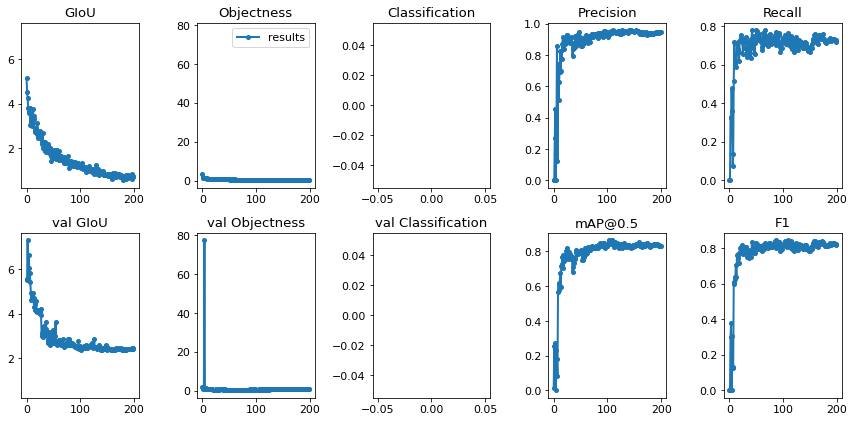

In [22]:
from utils import utils; utils.plot_results()

## Yolo training (babyyoda)

In [0]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3
!python train.py --data /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnewdata.txt --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --nosave --single-cls

/content/drive/My Drive/EVA4/tsai/YoloV3
Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='/content/drive/My Drive/EVA4/tsai/YoloV3/data/customdata/customnewdata.txt', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=True, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 21:13:07.498928: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (212 found, 0 missing, 26 empty, 0 duplicate, for 250 images): 100% 250/250 [00:00<00:00, 1165.54it/s]
Caching images (0.1GB): 100% 250/250 [00:00<00:00, 301.63it/s]

In [0]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3
!python train.py --data /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnewdata.txt --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 50 --nosave

## Custom dataset run

In [0]:
!python train.py --data /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnew.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --nosave

In [0]:
!python train.py --data /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnew.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --nosave

## Yolo detection

In [0]:
!cp /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnames.txt /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/custom.names
!python3 detect.py --source /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/babyyoda4.mp4

In [25]:
%cd /content/drive/My\ Drive/EVA4/tsai/YoloV3_2
#!cp /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/customnames.txt /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/custom.names
!python3 detect.py --source /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/babyyoda2.mp4 --weights /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/weights/babyyoda_final.pt
#!python3 detect.py --source /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/babyyoda2.mp4 --weights /content/drive/My Drive/EVA4/tsai/YoloV3_2/weights/babyyoda_final.pt

/content/drive/My Drive/EVA4/tsai/YoloV3_2
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='/content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda2.mp4', view_img=False, weights='/content/drive/My Drive/EVA4/tsai/YoloV3_2/weights/babyyoda_final.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/825) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda2.mp4: 320x512 Done. (0.031s)
video 1/1 (2/825) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda2.mp4: 320x512 Done. (0.029s)
video 1/1 (3/825) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda2.mp4: 320x512 Done. (0.029s)
video 1/1 (4/825) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda2.mp4: 320x512 Done. (0.029s)
vid

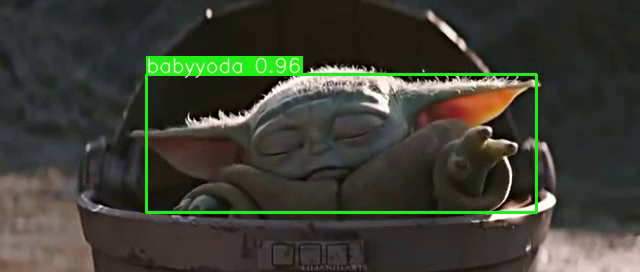

In [27]:
Image(filename='/content/drive/My Drive/EVA4/tsai/YoloV3_2/snips/babyyoda11.png', width=600)

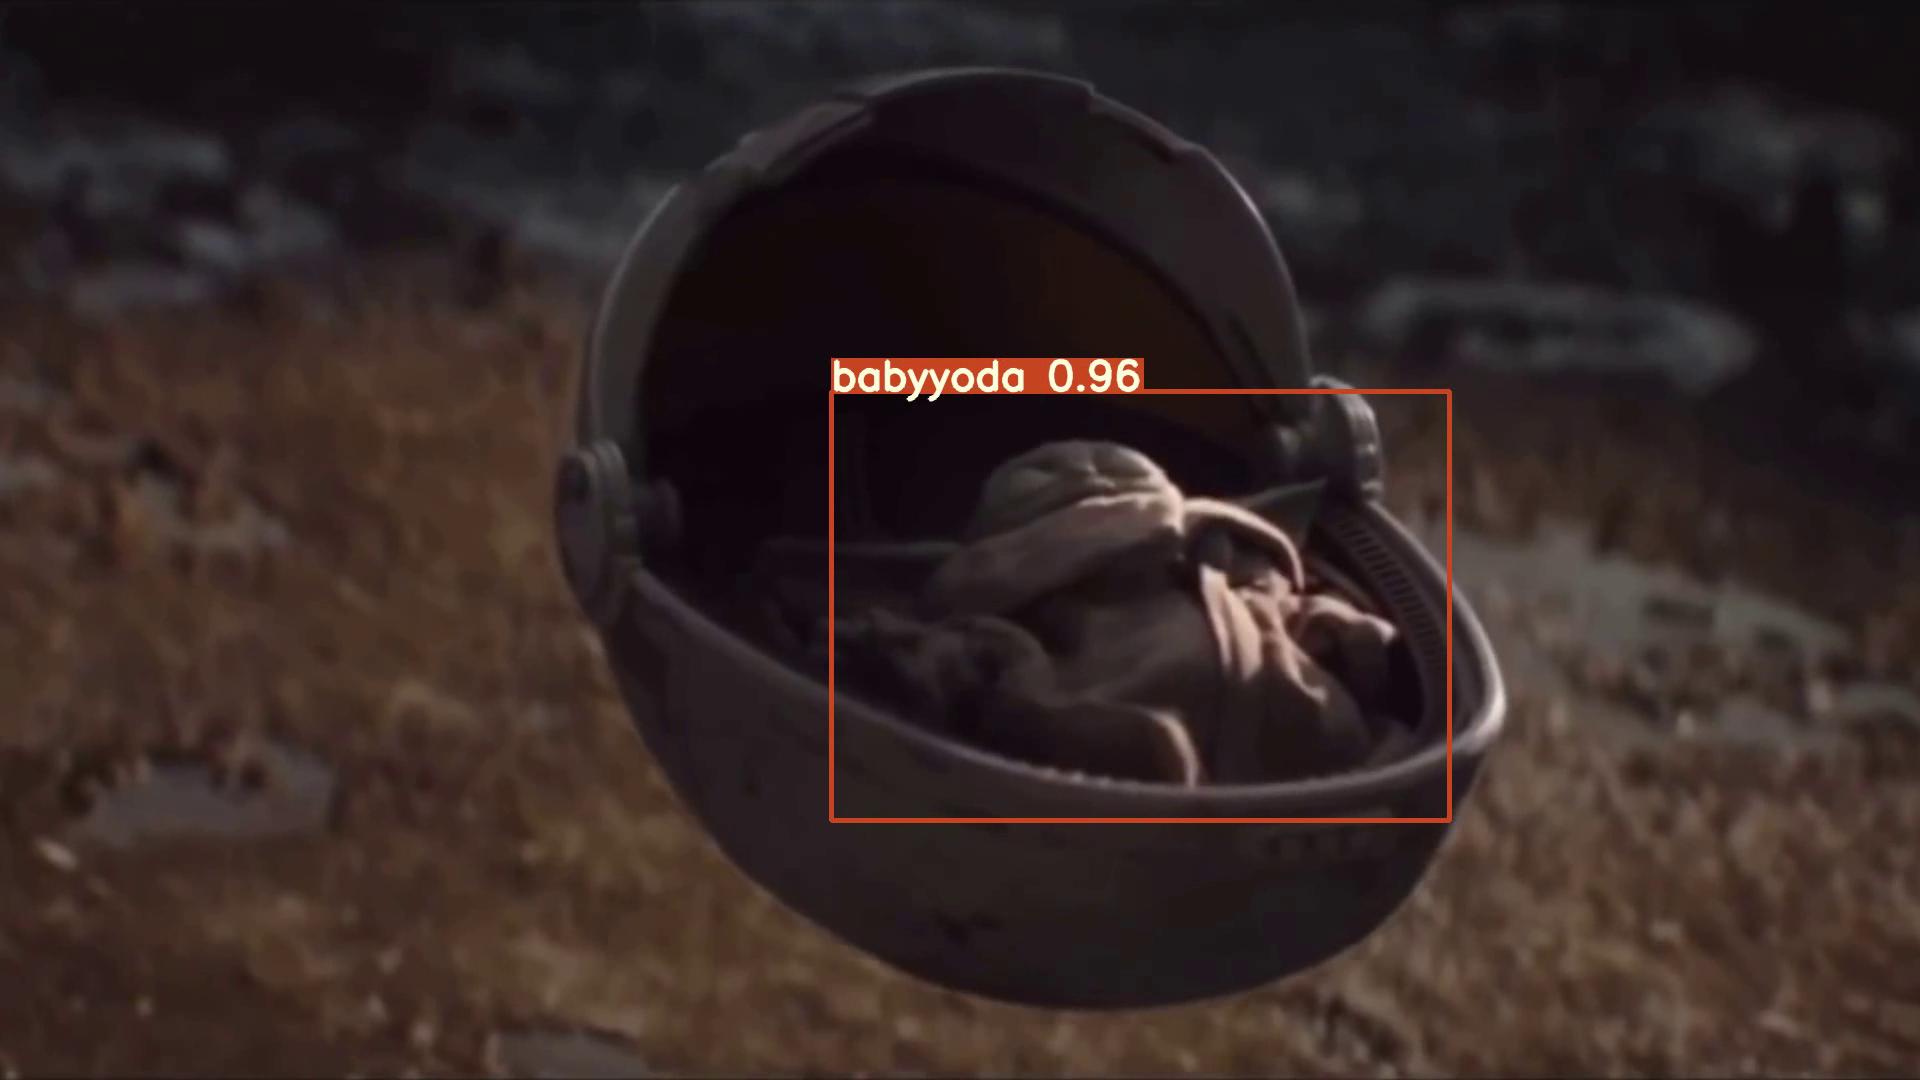

In [21]:
import glob
#from PIL import Image
from IPython.display import Image, clear_output 

#for file_name in glob.glob('/content/drive/My Drive/EVA4/tsai/YoloV3_2/snips/*'):
Image(filename='/content/drive/My Drive/EVA4/tsai/YoloV3_2/snips/babyyodasnap3.png', width=600)

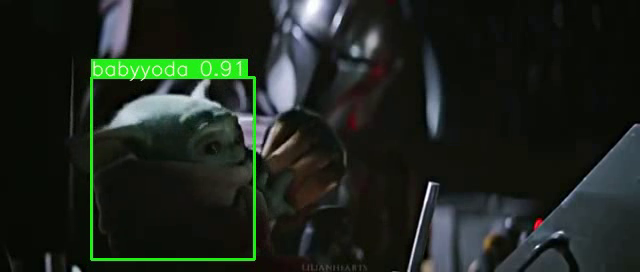

In [26]:
Image(filename='/content/drive/My Drive/EVA4/tsai/YoloV3_2/snips/babyyoda13.png', width=600)

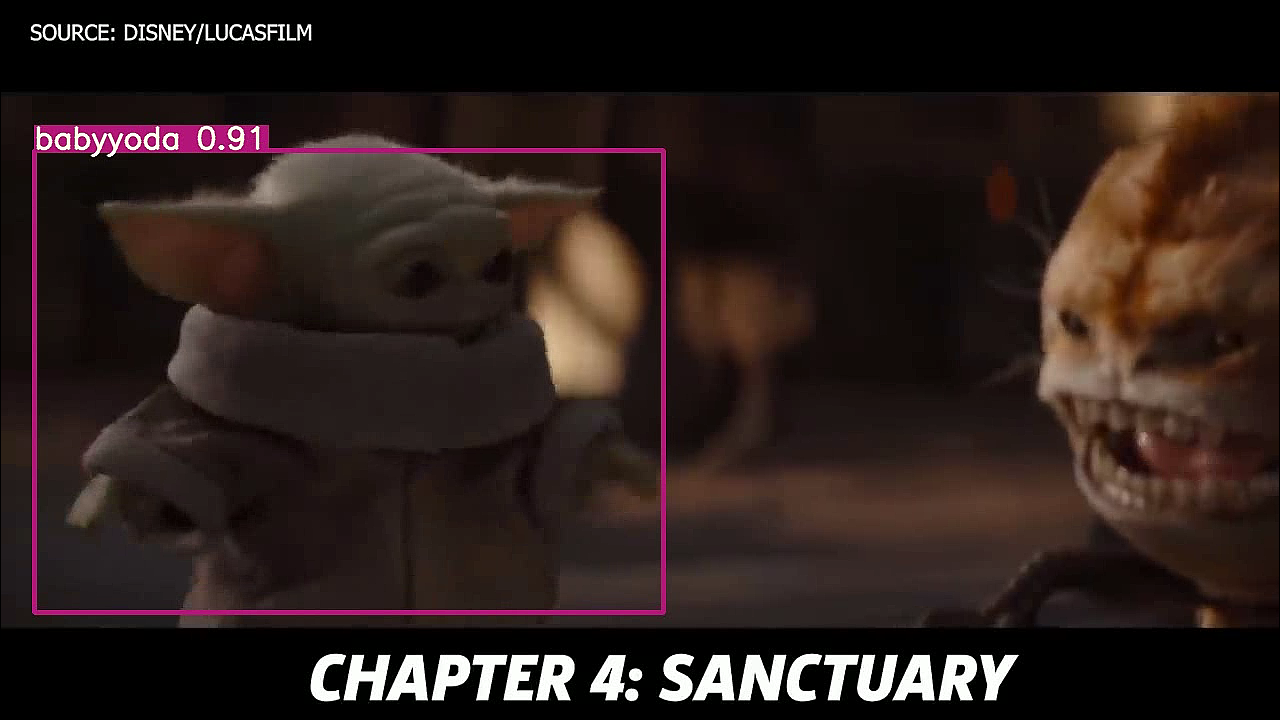

In [31]:
Image(filename='/content/drive/My Drive/EVA4/tsai/YoloV3_2/snips/babyyoda3.png', width=600)

In [32]:
!python detect.py --conf-thres 0.1 --output out_out --source /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/babyyoda3.mp4 --weights /content/drive/My\ Drive/EVA4/tsai/YoloV3_2/weights/babyyoda_final.pt

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='/content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda3.mp4', view_img=False, weights='/content/drive/My Drive/EVA4/tsai/YoloV3_2/weights/babyyoda_final.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1433) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda3.mp4: 320x512 1 babyyodas, Done. (0.031s)
video 1/1 (2/1433) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda3.mp4: 320x512 1 babyyodas, Done. (0.029s)
video 1/1 (3/1433) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda3.mp4: 320x512 1 babyyodas, Done. (0.029s)
video 1/1 (4/1433) /content/drive/My Drive/EVA4/tsai/YoloV3_2/babyyoda3.mp4: 320x512 1 babyyodas, Done

In [0]:
!python3 detect.py --source /content/drive/My\ Drive/EVA4/tsai/YoloV3/data/customdata/images